In [14]:
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import os
import matplotlib.pyplot as plt
from PIL import Image

def load_parquet_data(sample_size=None):
    """
    Load the merged parquet file and return the data
    
    Parameters:
    sample_size (int, optional): If provided, only load this many samples randomly
    
    Returns:
    Tuple of (images, artists, styles, titles)
    """
    current_path = '/home/work/workspace_ai/Artificlass/data_process'
    parquet_file = os.path.join(current_path, 'data', 'top6_styles_merged.parquet')
    
    print(f"Loading data from {parquet_file}")
    
    # Read the parquet file
    table = pq.read_table(parquet_file)
    df = table.to_pandas()
    
    # If sample_size is specified, take a random sample
    if sample_size is not None and sample_size < len(df):
        df = df.sample(sample_size, random_state=42)
        print(f"Sampled {sample_size} examples from dataset")
    
    # Extract data
    images = np.array([np.array(img) for img in df['image']])
    artists = np.array(df['artist'])
    styles = np.array(df['style'])
    titles = np.array(df['title'])
    
    print(f"Loaded {len(images)} images")
    print(f"Unique styles: {np.unique(styles)}")
    print(f"Images shape: {images.shape}")
    
    return images, artists, styles, titles

def display_sample_images(images, styles, num_samples=5):
    """Display some sample images with their style labels"""
    indices = np.random.choice(len(images), num_samples, replace=False)
    
    plt.figure(figsize=(15, 3*num_samples))
    for i, idx in enumerate(indices):
        img = images[idx].transpose(1, 2, 0)  # Convert from (C,H,W) to (H,W,C)
        plt.subplot(num_samples, 1, i+1)
        plt.imshow(img)
        plt.title(f"Style: {styles[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


In [5]:
import pyarrow.dataset as ds
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import os
import matplotlib.pyplot as plt
from PIL import Image


dataset = ds.dataset('/home/work/workspace_ai/Artificlass/data_process/data/top6_styles_merged.parquet', format='parquet')
scanner = dataset.scanner(
    columns=['image','artist','style','title'],
    use_threads=True,        # 멀티스레드로 청크 병렬 해제
    batch_size=1000          # 한 번에 1,000개 레코드씩 처리
)
for batch in scanner.to_batches():
    images = batch.column('image')   # NDArrayList
    # img=images[1].transpose(1,2,0)
    
    plt.imshow(img)
    plt.show()
    # …배치 단위 ML 파이프라인에 공급…


NameError: name 'img' is not defined

In [13]:
# np.shape(np.array(images[1]).transpose(1,2,0))
images.dtype()

AttributeError: 'pyarrow.lib.ListArray' object has no attribute 'dtype'

TypeError: Image data of dtype object cannot be converted to float

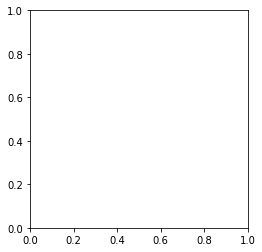

In [12]:
plt.imshow(np.array(images[1]).transpose(1,2,0))

In [15]:
# Load a small sample for demonstration
images, artists, styles, titles = load_parquet_data(sample_size=10)

# Display some sample images
display_sample_images(images, styles, num_samples=5)

# Print unique styles
style_counts = {style: np.sum(styles == style) for style in np.unique(styles)}
print("\nStyle distribution in sample:")
for style, count in style_counts.items():
    print(f"{style}: {count} images")

Loading data from /home/work/workspace_ai/Artificlass/data_process/data/top6_styles_merged.parquet


: 

: 

In [1]:
import pyarrow.parquet as pq

# 테이블 전체를 한 번에 만들었다 가정…
# table = pa.Table.from_batches([...])

# # row_group_size를 2000으로 설정
# pq.write_table(
#     table,
#     '/home/work/workspace_ai/Artificlass/data_process/data/top6_styles_merged.parquet',
#     compression='snappy',        # Snappy로 CPU 부담 낮추기
#     use_dictionary=True,         # 카테고리컬 컬럼 효율화
#     row_group_size=2000,         # 2천개씩 묶어서 씀
#     use_threads=True             # 멀티스레드 압축/쓰기
# )

df=pq.read_table('/home/work/workspace_ai/Artificlass/data_process/data/top6_styles_merged.parquet', use_threads=True)


/opt/conda/lib/python3.8/site-packages/pandas/compat/_optional.py:161: UserWarning: Pandas requires version '2.7.1' or newer of 'numexpr' (version '2.7.0' currently installed).
  warnings.warn(msg, UserWarning)


In [1]:
import pyarrow.parquet as pq
import pyarrow as pa

# 1. ParquetFile 객체 생성
pf = pq.ParquetFile(
    '/home/work/workspace_ai/Artificlass/data_process/data/top6_styles_merged.parquet'
)

# 2. batch_size=1000 로이터레이터 생성
batches = pf.iter_batches(batch_size=1000)

# 3. 첫 번째 배치(최대 1000행)만 가져오기
first_batch = next(batches)

# 4. Arrow Table 로 변환
table_1000 = pa.Table.from_batches([first_batch])

# 5. pandas DataFrame 으로 변환 (필요시)
df_1000 = table_1000.to_pandas()

print(df_1000.shape)  # (<=1000, 컬럼수)


/opt/conda/lib/python3.8/site-packages/pandas/compat/_optional.py:161: UserWarning: Pandas requires version '2.7.1' or newer of 'numexpr' (version '2.7.0' currently installed).
  warnings.warn(msg, UserWarning)


(1000, 4)


In [16]:
import numpy as np
# 'image', 'artist', 'style', 'title'
np.shape(np.array(df_1000['image'][0]))

AttributeError: module 'numpy' has no attribute 'narray'